In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [ ]:
train_data = pd.read_csv("/content/Kaggle_Training_Dataset_v2.csv")
train_data.values

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[1026827, 0.0, nan, ..., 'Yes', 'No', 'No'],
       [1043384, 2.0, 9.0, ..., 'Yes', 'No', 'No'],
       [1043696, 2.0, nan, ..., 'Yes', 'No', 'No'],
       ...,
       ['1439563', 62.0, 9.0, ..., 'Yes', 'No', 'No'],
       ['1502009', 19.0, 4.0, ..., 'Yes', 'No', 'No'],
       ['(1687860 rows)', nan, nan, ..., nan, nan, nan]], dtype=object)

In [ ]:
test_data = pd.read_csv("/content/Kaggle_Test_Dataset_v2.csv")
test_data.values

array([[3285085, 62.0, nan, ..., 'Yes', 'No', 'No'],
       [3285131, 9.0, nan, ..., 'No', 'No', 'No'],
       [3285358, 17.0, 8.0, ..., 'Yes', 'No', 'No'],
       ...,
       ['3526990', 10.0, 12.0, ..., 'Yes', 'No', 'No'],
       ['3526991', 2913.0, 12.0, ..., 'Yes', 'No', 'No'],
       ['(242075 rows)', nan, nan, ..., nan, nan, nan]], dtype=object)

In [ ]:
train_data.shape,test_data.shape

((1687861, 23), (242076, 23))

In [ ]:
df = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242076 entries, 0 to 242075
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                242076 non-null  object 
 1   national_inv       242075 non-null  float64
 2   lead_time          227351 non-null  float64
 3   in_transit_qty     242075 non-null  float64
 4   forecast_3_month   242075 non-null  float64
 5   forecast_6_month   242075 non-null  float64
 6   forecast_9_month   242075 non-null  float64
 7   sales_1_month      242075 non-null  float64
 8   sales_3_month      242075 non-null  float64
 9   sales_6_month      242075 non-null  float64
 10  sales_9_month      242075 non-null  float64
 11  min_bank           242075 non-null  float64
 12  potential_issue    242075 non-null  object 
 13  pieces_past_due    242075 non-null  float64
 14  perf_6_month_avg   242075 non-null  float64
 15  perf_12_month_avg  242075 non-null  float64
 16  lo

In [ ]:
df.head(15)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
5,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No
6,1044643,1095.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,Yes,No,Yes,Yes,No,No
8,1045815,140.0,NaN,0.0,15.0,114.0,152.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
9,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No


In [ ]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


national_inv         496.111782
lead_time              7.872267
in_transit_qty        44.052022
forecast_3_month     178.119284
forecast_6_month     344.986664
forecast_9_month     506.364431
sales_1_month         55.926069
sales_3_month        175.025930
sales_6_month        341.728839
sales_9_month        525.269701
min_bank              52.772303
pieces_past_due        2.043724
perf_6_month_avg      -6.872059
perf_12_month_avg     -6.437947
local_bo_qty           0.626451
deck_risk              0.229571
oe_constraint          0.000145
dtype: float64

In [ ]:
df_test.head(15)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No
5,3285960,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.37,0.68,0.0,No,No,No,Yes,No,No
6,3286073,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
7,3286113,28.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
8,3286206,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,Yes,Yes,No,No
9,3286325,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No


In [ ]:
print((df["went_on_backorder"].values == "Yes").sum())
print((df["went_on_backorder"].values == "No").sum())

11293
1676567


In [ ]:
def mapping(dataFrame, lis):
  for i in lis:
      dataFrame[i] = dataFrame[i].map({'Yes':1, 'No':0})

mapping(df,["deck_risk","oe_constraint"])
df["deck_risk"].values

array([ 0.,  0.,  1., ...,  0.,  0., nan])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [ ]:
mapping(df_test,["deck_risk","oe_constraint"])
df_test["deck_risk"].values

array([ 1.,  0.,  0., ...,  1.,  1., nan])

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242076 entries, 0 to 242075
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                242076 non-null  object 
 1   national_inv       242075 non-null  float64
 2   lead_time          227351 non-null  float64
 3   in_transit_qty     242075 non-null  float64
 4   forecast_3_month   242075 non-null  float64
 5   forecast_6_month   242075 non-null  float64
 6   forecast_9_month   242075 non-null  float64
 7   sales_1_month      242075 non-null  float64
 8   sales_3_month      242075 non-null  float64
 9   sales_6_month      242075 non-null  float64
 10  sales_9_month      242075 non-null  float64
 11  min_bank           242075 non-null  float64
 12  potential_issue    242075 non-null  object 
 13  pieces_past_due    242075 non-null  float64
 14  perf_6_month_avg   242075 non-null  float64
 15  perf_12_month_avg  242075 non-null  float64
 16  lo

In [ ]:
df['deck_risk'] = df['deck_risk'].map({'Yes':1, 'No':0})
df['oe_constraint'] = df['oe_constraint'].map({'Yes':1, 'No':0})
df['ppap_risk'] = df['ppap_risk'].map({'Yes':1, 'No':0})
df['stop_auto_buy'] = df['stop_auto_buy'].map({'Yes':1, 'No':0})
df['potential_issue'] = df['potential_issue'].map({'Yes':1, 'No':0})
df['went_on_backorder'] = df['went_on_backorder'].map({'Yes':1, 'No':0})

(array([1.687615e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 2.450000e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

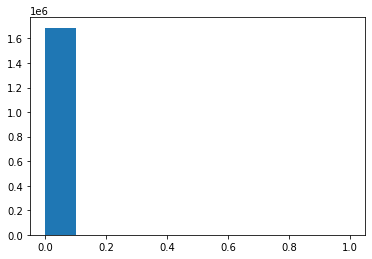

In [ ]:
plt.hist('oe_constraint', bins=10, data=df)

In [ ]:
df["oe_constraint"].value_counts()

0.0    1687615
1.0        245
Name: oe_constraint, dtype: int64

(array([1484026.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,  203834.]),
 array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
        0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
        0.90909091, 1.        ]),
 <a list of 11 Patch objects>)

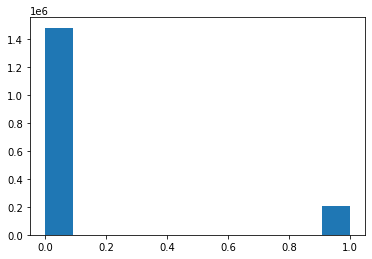

In [ ]:
plt.hist('ppap_risk', bins=11, data=df)

In [ ]:
df["sku"].nunique()
df.drop(df.tail(1).index,inplace=True)

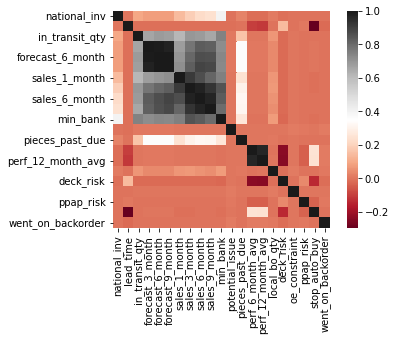

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap= 'RdGy',square="True") 

In [ ]:
# from pandas.core.indexes import category
# df["deck_risk"].unique()
# df["deck_risk_new"] = df["deck_risk"]
# df["deck_risk_new"] = pd.Categorical(df["deck_risk_new"])
# df.loc[df["deck_risk"]== "No", "deck_risk_new"] = 0
# df["deck_risk_new"]
df["deck_risk"]

0          0.0
1          0.0
2          1.0
3          0.0
4          1.0
          ... 
1687855    1.0
1687856    0.0
1687857    1.0
1687858    0.0
1687859    0.0
Name: deck_risk, Length: 1687860, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687860 entries, 0 to 1687859
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687860 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  float64
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [ ]:
# df_temp = df.copy()
# # df_temp.loc[df_temp["deck_risk"]== "No", "deck_risk"] = 0
# # df_temp.loc[df_temp["deck_risk"]== "Yes", "deck_risk"] = 1
# df_temp["deck_risk"].unique()
# df_temp['deck_new'] = df_temp['deck_risk'].map({'Yes':1, 'No':0})
# df_temp['deck_new']

In [ ]:
# def artif_enco(df , column ):
#   #val = df[column][i]
#   for val in df[column]:
#     if val == "Yes":
#       df[column] = (df[column] == 'Yes').astype(int)
#     elif val == "No" :
#       df[column] = (df[column] == 'No').astype(int)
#     else:
#       continue
#     print (val) 

  # i =0 
  # for val in df[column][i]:
  #   if val == "Yes":
  #     df[column][i] = 1
    
  #   elif val=="No":
  #     df[column][i] = 0

  #   else:
  #     df[column][i] = np.NaN
  #   i = i+1


In [ ]:
# df['deck_risk']=df['deck_risk'].astype('category')
# enc = OneHotEncoder(handle_unknown='ignore')
# df['deck_risk_num'] =df['deck_risk'].cat.codes
# enc.fit_transform(df[['deck_risk_num']].toarray().reshape(1,-1))

In [ ]:
# df[df["lead_time"].isna()] = df["lead_time"].mean()
# df[df["potential_issue"].isna()]

In [ ]:
df.isnull().sum()

sku                       0
national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

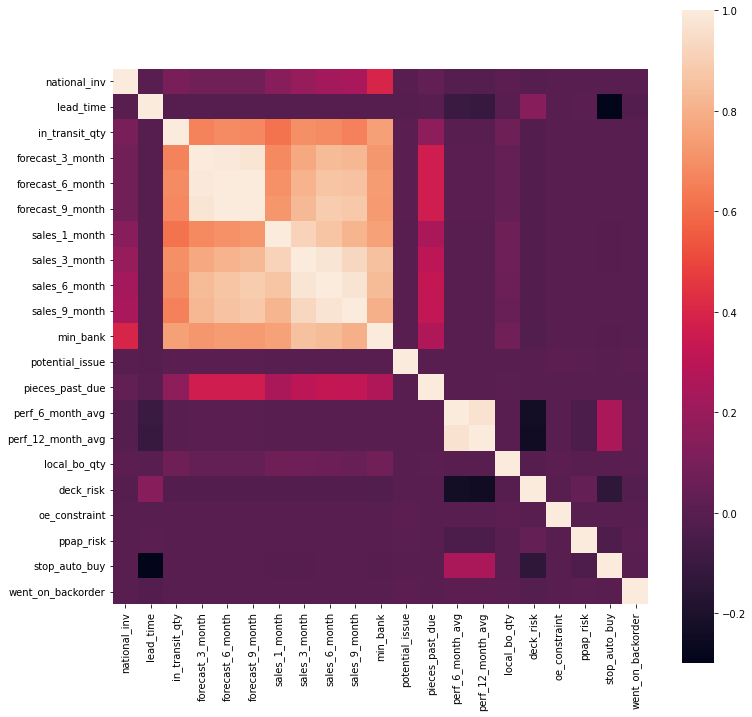

In [ ]:
from IPython.core.pylabtools import figsize
import seaborn as sns
f, ax = plt.subplots(figsize= (12,12))
corr = df.corr()
sns.heatmap(corr,square="True")
plt.show()

In [ ]:
corr.nlargest(10,"went_on_backorder")["went_on_backorder"]

went_on_backorder    1.000000
potential_issue      0.014090
perf_6_month_avg     0.011676
perf_12_month_avg    0.011593
local_bo_qty         0.009504
ppap_risk            0.008814
oe_constraint        0.003837
pieces_past_due      0.000516
forecast_3_month    -0.000340
forecast_6_month    -0.000840
Name: went_on_backorder, dtype: float64

None of the features have very high co-relation with our final output variable

In [ ]:
x= df.drop(["went_on_backorder","sku","rev_stop","lead_time","oe_constraint"], axis=1)
y = df["went_on_backorder"]

In [ ]:
x.shape

(1687860, 19)

In [ ]:
y.shape

(1687860,)

In [ ]:
x.select_dtypes(["object"]).columns

Index([], dtype='object')

In [ ]:
x.select_dtypes(["float64","int64"]).columns

Index(['national_inv', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy'],
      dtype='object')

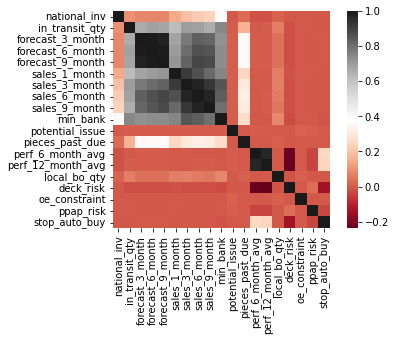

In [ ]:
corr = x.corr()
sns.heatmap(corr, cmap= 'RdGy',square="True") 

forecast and perf of months are highly correlated in themselves but perf is not highly related to local_bo_qty

perf_6_month_avg and perf_12_month_avg are also highly correlated to output variable and within themselves so dropping perf_12_month_avg 

In [ ]:
x = x.drop(["perf_12_month_avg"],axis = 1)
x = x.drop(["forecast_9_month"],axis = 1)

In [ ]:
corr.nlargest(10,"local_bo_qty")["local_bo_qty"]

local_bo_qty        1.000000
min_bank            0.076678
sales_3_month       0.071030
in_transit_qty      0.066612
sales_1_month       0.066188
sales_6_month       0.057765
sales_9_month       0.048880
forecast_9_month    0.039732
forecast_6_month    0.039724
forecast_3_month    0.039419
Name: local_bo_qty, dtype: float64

sales_1_month has highest correlation wrt local_bo_qty following by forecast_3_month , forecast_6_month and forecast_9_month .

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import SGDClassifier as SGDC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from xgboost import XGBClassifier as XGBC
from catboost import CatBoostClassifier , metrics, cv, Pool
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score ,roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np


def train_SGDClassifier(train_X, train_Y, val_X=None, val_Y=None):
	sgdc = SGDC( loss='log', penalty='elasticnet',  alpha=0.001, learning_rate='optimal')
	print(' Training logistic regression ...')
	sgdc.fit(train_X,train_Y)
	if (val_X is not None) and (val_Y is not None):
		predictions = sgdc.predict(val_X)
		print("Accuracy::",sgdc.score(val_X,val_Y))

  

def train_logistic_regression(train_X, train_Y, val_X=None, val_Y=None):
	# sgdc = SGDC( loss='log', penalty='elasticnet',  alpha=0.001, learning_rate='optimal')
	model = OneVsOneClassifier(LogisticRegression())
	print(' Training logistic regression ...')
	model.fit(train_X,train_Y)
	if (val_X is not None) and (val_Y is not None):
		predictions = model.predict(val_X) 
		print("Accuracy::",model.score(val_X,val_Y))
  

def train_xgb(train_X,train_Y,val_X,val_Y):
	xgbc = XGBC()
	print(' XGBoost Training !!!')
	xgbc.fit(train_X,train_Y, verbose= True)
	if (val_X is not None) and (val_Y is not None):
		predictions = xgbc.predict(val_X)
		print("Accuracy::",xgbc.score(val_X,val_Y))

def train_catboost(train_X,train_Y,val_X,val_Y):

	model = CatBoostClassifier(loss_function='MultiClass',
															random_seed=42,
															logging_level='Silent'
															)
	model.fit(train_X, train_Y, eval_set=(val_X,val_Y), plot=True)
	y_pred = model.predict(val_X)
	print(accuracy_score(val_Y, y_pred))
	print(precision_score(val_Y,y_pred))
	print(roc_auc_score(val_Y,y_pred))


	accuracies = cross_val_score(estimator = model, X = train_X, y = train_Y, cv = 3)
	print("Accuracy:{:.2f} %".format(accuracies.mean()*100))
	print("Standard Deviation:{:.2f} %".format(accuracies.std()*100))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)


In [ ]:
# train_SGDClassifier(X_train, Y_train, X_test, Y_test)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687860 entries, 0 to 1687859
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   national_inv      1687860 non-null  float64
 1   in_transit_qty    1687860 non-null  float64
 2   forecast_3_month  1687860 non-null  float64
 3   forecast_6_month  1687860 non-null  float64
 4   sales_1_month     1687860 non-null  float64
 5   sales_3_month     1687860 non-null  float64
 6   sales_6_month     1687860 non-null  float64
 7   sales_9_month     1687860 non-null  float64
 8   min_bank          1687860 non-null  float64
 9   potential_issue   1687860 non-null  float64
 10  pieces_past_due   1687860 non-null  float64
 11  perf_6_month_avg  1687860 non-null  float64
 12  local_bo_qty      1687860 non-null  float64
 13  deck_risk         1687860 non-null  float64
 14  oe_constraint     1687860 non-null  float64
 15  ppap_risk         1687860 non-null  float64
 16  

In [ ]:
model1 = train_logistic_regression(X_train, Y_train, X_test, Y_test)

 Training logistic regression ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy:: 0.9931363713074108


In [ ]:
train_xgb(X_train, Y_train, X_test, Y_test)

 XGBoost Training !!!
Accuracy:: 0.9932279342326847


In [ ]:
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE(sampling_strategy=0.1)
x, y = oversample.fit_resample(x, y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
train_catboost(X_train, Y_train, X_test, Y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.9934505578157036
0.6632124352331606
0.533798775265844
Accuracy:99.35 %
Standard Deviation:0.00 %


In [ ]:
## FC network 
import torch
from torch import nn
from torchvision import transforms

class FCNetwork(nn.Module):
    def __init__(self, in_feat, num_class):
        super().__init__()
        
        # define the layers
        self.layers = nn.Sequential(
            nn.Linear(in_feat, 256),
			nn.BatchNorm1d(256, momentum=0.1),
            nn.ReLU(),
			nn.Dropout(p=0.2),
            nn.Linear(256, 512),
			nn.BatchNorm1d(512, momentum=0.1),
            nn.ReLU(),
			nn.Dropout(p=0.2),
			nn.Linear(512, num_class),
			nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        # forward pass
        # x = torch.sigmoid(self.layers(x))
        x = self.layers(x)
        return x	
	
def next_batch(inputs, targets, batchSize):
	# loop over the dataset
	for i in range(0, inputs.shape[0], batchSize):
		# yield a tuple of the current batched data and labels
		yield (inputs[i:i + batchSize], targets[i:i + batchSize])

In [ ]:
# determine the device we will be using for training
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cuda'

In [ ]:
X_train = x.to_numpy()
df_test['deck_risk'] = df_test['deck_risk'].map({'Yes':1, 'No':0})
df_test['oe_constraint'] = df_test['oe_constraint'].map({'Yes':1, 'No':0})
df_test['ppap_risk'] = df_test['ppap_risk'].map({'Yes':1, 'No':0})
df_test['stop_auto_buy'] = df_test['stop_auto_buy'].map({'Yes':1, 'No':0})
df_test['potential_issue'] = df_test['potential_issue'].map({'Yes':1, 'No':0})
df_test['went_on_backorder'] = df_test['went_on_backorder'].map({'Yes':1, 'No':0})
x_test = df_test.drop(["went_on_backorder","sku","rev_stop","lead_time","forecast_9_month","perf_12_month_avg","oe_constraint"], axis=1)
Y_train = y
X_test = x_test.to_numpy()
Y_test = df_test["went_on_backorder"]
x_test.info()

# y = y.to_numpy()
# X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242076 entries, 0 to 242075
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   national_inv      242075 non-null  float64
 1   in_transit_qty    242075 non-null  float64
 2   forecast_3_month  242075 non-null  float64
 3   forecast_6_month  242075 non-null  float64
 4   sales_1_month     242075 non-null  float64
 5   sales_3_month     242075 non-null  float64
 6   sales_6_month     242075 non-null  float64
 7   sales_9_month     242075 non-null  float64
 8   min_bank          242075 non-null  float64
 9   potential_issue   0 non-null       float64
 10  pieces_past_due   242075 non-null  float64
 11  perf_6_month_avg  242075 non-null  float64
 12  local_bo_qty      242075 non-null  float64
 13  deck_risk         0 non-null       float64
 14  ppap_risk         0 non-null       float64
 15  stop_auto_buy     0 non-null       float64
dtypes: float64(16)
memor

In [ ]:
def train_FCnetwork(train_X,train_Y,val_X,val_Y):

	BATCH_SIZE = 16
	EPOCHS = 200
	LR = 0
	PATIENCE = 5
	patience = 0
	early_stopping =True
	num_class= 2

	(trainX, testX, trainY, testY) = train_test_split(train_X, train_Y,test_size=0.15, random_state=95)
	trainX = torch.from_numpy(trainX)
	testX = torch.from_numpy(testX)
	trainY = torch.from_numpy(trainY.to_numpy())
	testY = torch.from_numpy(testY.to_numpy())
	val_X = torch.from_numpy(val_X)
	val_Y = torch.from_numpy(val_Y.to_numpy())

	mean , std = trainX.mean() , trainX.std()
	trainX = (trainX - mean)/ std
	testX = (testX - mean)/ std
	trainX.Normalize(mean, std)
	# import pdb; pdb.set_trace()
	fc_model= FCNetwork(in_feat=trainX.shape[1], num_class=num_class).to(DEVICE)
	print(fc_model)
	# initialize optimizer and loss function
	# opt = SGD(fc_model.parameters(), lr=LR)
	lossFunc = nn.CrossEntropyLoss()
	first_x, first_y = testX[:16], testY[:16]
	min_loss= lossFunc(fc_model(first_x.to(DEVICE)),first_y.to(DEVICE).long()).item()
	print("Starting with val loss ", min_loss)
	# loop through the epochs
	trainTemplate = "epoch: {} train loss: {:.3f} train accuracy: {:.3f}"
	for epoch in range(0, EPOCHS):
		# initialize tracker variables and set our model to trainable
		print("[INFO] epoch: {}...".format(epoch + 1))
		trainLoss = 0
		trainAcc = 0
		samples = 0
		fc_model.train()

		if epoch == 1:
			LR = 0.00003
			print('[+] set lr={}'.format(LR))
		if patience == PATIENCE:
			patience = 0
			fc_model.load_state_dict(torch.load('{}/mpl_model.pth'.format('./models')))
			LR = LR / 10
			print('[+] set lr={}'.format(LR))
		if epoch == 0:
			LR = 0.001
			print('[+] set lr={}'.format(LR))
			opt = torch.optim.Adam(fc_model.parameters(), lr=LR)
		else:
			opt = torch.optim.Adam(fc_model.parameters(), lr=LR, weight_decay=0.0001)
		# loop over the current batch of data
		for (batchX, batchY) in next_batch(trainX, trainY, BATCH_SIZE):
			# flash data to the current device, run it through our
			# model, and calculate loss
			(batchX, batchY) = (batchX.to(DEVICE), batchY.to(DEVICE))
			predictions = fc_model(batchX)
			loss = lossFunc(predictions, batchY.long())
			# zero the gradients accumulated from the previous steps,
			# perform backpropagation, and update model parameters
			opt.zero_grad()
			loss.backward()
			opt.step()
			# update training loss, accuracy, and the number of samples
			# visited
			# trainLoss += loss.item() * batchY.size(0)
			trainLoss += loss.item()
			trainAcc += (predictions.max(1)[1] == batchY).sum().item()
			samples += batchY.size(0)
		# display model progress on the current training batch
			# import pdb; pdb.set_trace()
		print(trainTemplate.format(epoch + 1, (trainLoss / samples),
			(trainAcc / samples)))

		# initialize tracker variables for testing, then set our model to
		# evaluation mode
		testLoss = 0
		testAcc = 0
		samples = 0
		fc_model.eval()
		testTemplate = "epoch: {} test loss: {:.3f} test accuracy: {:.3f}"
		# initialize a no-gradient context
		with torch.no_grad():
			# loop over the current batch of test data
			for (batchX, batchY) in next_batch(val_X, val_Y, BATCH_SIZE):
				# flash the data to the current device
				(batchX, batchY) = (batchX.to(DEVICE), batchY.to(DEVICE))
				# run data through our model and calculate loss
				predictions = fc_model(batchX)
				loss = lossFunc(predictions, batchY.long())
				# update test loss, accuracy, and the number of
				# samples visited
				testLoss += loss.item() * batchY.size(0)
				testAcc += (predictions.max(1)[1] == batchY).sum().item()
				samples += batchY.size(0)
			# display model progress on the current test batch
			
			print(testTemplate.format(epoch + 1, (testLoss / samples),
				(testAcc / samples)))
			# import pdb;pdb.set_trace()
			print("")
			if (testLoss / samples) < min_loss:
				torch.save(fc_model.state_dict(), '{}/mpl_model.pth'.format('./models'))
				print('[+] val loss improved from {} to {}. Saved!'.format(min_loss, testLoss/samples))
				min_loss = testLoss / samples
				patience = 0
			else:
				patience +=1
		
		if early_stopping:
			if LR < 1e-15:
				break

In [ ]:
import os
os.mkdir("./models")
train_FCnetwork(X_train, Y_train, X_test, Y_test)

FCNetwork(
  (layers): Sequential(
    (0): Linear(in_features=16, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=256, out_features=512, bias=True)
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=512, out_features=2, bias=True)
    (9): Softmax(dim=1)
  )
)
Starting with val loss  0.7307068109512329
[INFO] epoch: 1...
[+] set lr=0.001
epoch: 1 train loss: 0.020 train accuracy: 0.993
epoch: 1 test loss: nan test accuracy: 0.000

[INFO] epoch: 2...
[+] set lr=3e-05
epoch: 2 train loss: 0.020 train accuracy: 0.993
epoch: 2 test loss: nan test accuracy: 0.000

[INFO] epoch: 3...
epoch: 3 train loss: 0.020 train accuracy: 0.993
epoch: 3 test loss: nan test accuracy: 0.000

[INFO] epoch: 4...
epoch: 4 train loss: 0.0

FileNotFoundError: ignored